In [1]:
# 2 - In ‘coffee_dataset.csv’ dataset
# There’s a Hypothesis Says That ..People Who are older
# than or equal 21 Drinks coffee More Than Who Are
# Younger.
# Test This Hypothesis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("coffee_dataset.csv")

In [4]:
data.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


# Hypothesis #
## Null Hypothesis: People who are older than or equal 21 Drink less coffee than who are younger than 21 ##
#### Null Hypothesis: older_than_or_equal - younger <= 0
## Alternative Hypothesis: People who are older than or equal 21 Drink more coffee than who are younger than 21 ##
#### Atlernative Hypothesis: older_than_or_equal - younger > 0

# Observable Difference # 

In [16]:
older_than = data.query("drinks_coffee and age == '>=21'")
older_than.head()

,user_id,age,drinks_coffee,height
1,1864,>=21,True,65.824249
3,7875,>=21,True,68.569404
6,4996,>=21,True,70.828455
9,2368,>=21,True,66.208656
11,6103,>=21,True,68.905686


In [31]:
younger_than = data.query("drinks_coffee and age == '<21'")
younger_than.head()

,user_id,age,drinks_coffee,height
4,6254,<21,True,64.020226
12,1861,<21,True,62.646820
27,3071,<21,True,64.741701
38,4646,<21,True,63.564051
41,3805,<21,True,63.791531


In [30]:
obs_difference = older_than.shape[0] - younger_than.shape[0]
obs_difference

1232

In [32]:
difference = []
for _ in range(2000):
    sample = data.sample(data.shape[0],replace = True)
    older_than = sample.query("drinks_coffee and age == '>=21'")
    younger_than = sample.query("drinks_coffee and age == '<21'")
    difference.append(older_than.shape[0] - younger_than.shape[0])

(array([  1.,   5.,  31., 121., 341., 541., 526., 312.,  99.,  23.]),
 array([1083. , 1108.2, 1133.4, 1158.6, 1183.8, 1209. , 1234.2, 1259.4,
        1284.6, 1309.8, 1335. ]),
 <BarContainer object of 10 artists>)

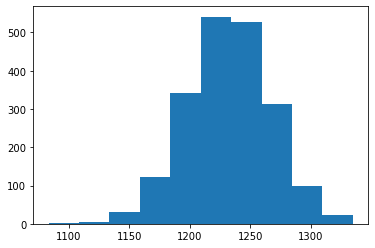

In [33]:
plt.hist(difference)

# Create Null population #

(array([  9.,  46., 182., 445., 555., 448., 238.,  67.,   7.,   3.]),
 array([-115.14855061,  -90.02615478,  -64.90375895,  -39.78136311,
         -14.65896728,   10.46342855,   35.58582438,   60.70822021,
          85.83061604,  110.95301187,  136.0754077 ]),
 <BarContainer object of 10 artists>)

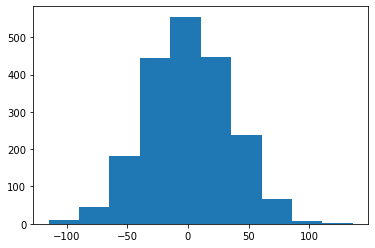

In [34]:
difference = np.array(difference)
normal = np.random.normal(0,difference.std(),difference.shape[0])
plt.hist(normal)

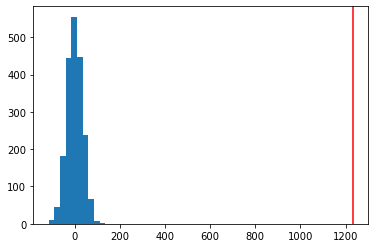

In [35]:
plt.hist(normal)
plt.axvline(obs_difference, c= 'red')

In [36]:
(normal>obs_difference).mean()

0.0

# Conclusion: Null Hypothesis Rejected, status changed #
#### People who are older than or equal 21 Drink more coffee than who are younger than 21 ####